In [1]:
#Global Header File

using LinearAlgebra             #   Linear Algebra 
using Kronecker                 #   For Kronecker Product 
using MKL                       #   MKL
using Plots, PyPlot             #   Plot Modules
using Random, Distributions     #   Random RandomMatrices
using RandomMatrices            #   Random Matrtices
using CSV, DelimitedFiles       #   File Management stuff
using DataFrames                #   File Management 
using ITensors
#using ITensorsVisualization     #   Packages for ITensors

In [2]:
#The spin 1 Algebra



#The X,Y,Z gates:


Z = [1 0 0; 0 0 0; 0 0 -1 ];
X = [0 1 0 ; 1 0 1; 0 1 0 ]/(sqrt(2));
Y = [0 -1im 0 ; im 0 -im; 0 im 0]/(sqrt(2));
S=  [0 1 0 ; 0 0 1; 1 0 0 ];

#The finite X,Y,Z Rotations:


function RX(r)
    exp(-im*r/2*X)
end


function RY(r)
    exp(-im*r/2*Y)
end


function RZ(r)
    exp(-im*r/2*Z)
end




V1=eigvecs(RX(4*pi/3));
V2=eigvecs(S);

UB=V1*conj(transpose(V2));
UBtr=V2*conj(transpose(V1));

L=UBtr*X*UB
#UBtr*RX(4*pi/3)*UB

function RS(r)
    exp(-im*r/2*L)
end

;

In [3]:
epsilon=0.0;
g=4*pi/3(1-epsilon);
XRow=copy(kronecker(RS(g),6));

In [4]:
h=rand(6)*pi/2;
J=rand(6)*pi/2;


#XRow=copy(kronecker(RX(o),RX(o),RX(o),RX(o),RX(o),RX(o)));
ZRow=copy(kronecker(RZ(h[1]),RZ(h[2]),RZ(h[3]),RZ(h[4]),RZ(h[5]),RZ(h[6])));

In [5]:
FU=fill(fill(0.1+im, 9,9), 5);

        

    theta=0.00;
    fone=copy(kronecker(Z,Z))
    Ltwo=copy(kronecker(exp(-im*theta/2*X),exp(-im*theta/2*X)))
    Lthree=copy(kronecker(exp(-im*theta/2*Y),exp(-im*theta/2*Y)))
 
    for j in 1:length(FU)
    FU[j]=Ltwo*Lthree*exp(-im*J[j]*fone);
    end


    
    UOdd=copy(kronecker(FU[1],FU[2],FU[3]));
    UEven=copy(kronecker(I(3),FU[4],FU[5],I(3)));


    A=XRow*UEven*UOdd
    

729×729 Matrix{ComplexF64}:
  4.23893e-91-3.83711e-91im  …    1.1887e-92-1.12315e-93im
  -2.4395e-91+4.17335e-91im      -2.4498e-77-4.85625e-78im
  1.15276e-76-6.16923e-76im     -1.50833e-92+2.8552e-93im
  -2.4395e-91+4.17335e-91im      -2.4498e-77-4.85625e-78im
  9.03223e-92-3.98591e-91im      4.62007e-62+2.43819e-62im
  6.42626e-77+5.26702e-76im  …   3.19405e-77+3.29568e-78im
  1.15276e-76-6.16923e-76im     -1.50833e-92+2.8552e-93im
  6.42626e-77+5.26702e-76im      3.19405e-77+3.29568e-78im
 -3.09318e-61-6.15537e-61im      1.89687e-92-5.45363e-93im
  -2.4395e-91+4.17335e-91im      -2.4498e-77-4.85625e-78im
  9.03223e-92-3.98591e-91im  …   4.62007e-62+2.43819e-62im
  6.42626e-77+5.26702e-76im      3.19405e-77+3.29568e-78im
  9.03223e-92-3.98591e-91im      4.62007e-62+2.43819e-62im
             ⋮               ⋱  
  6.15221e-31-3.37511e-31im     -6.71922e-77+1.19362e-77im
  -4.0996e-31+4.28841e-31im      1.41818e-61+1.62508e-62im
  3.13119e-16-7.03725e-16im      8.45938e-77-2.32921e-77

In [16]:


EigA=eigvals(A);
N=angle.(EigA);
Eigvec=eigvecs(A);
Ph=fill(0.0*im, length(EigA)+1,length(EigA));

Ph[1,:]=N;
for i in 1:length(EigA);
    for j in 1:length(EigA)
        Ph[i+1,j]=Eigvec[i,j];
    end
end

Phnew=copy(Ph[:,sortperm(real(Ph[1, :]))]); # Phase orders the eigenstates from -pi to pi

EigvecNew=Eigvec;

for i in 1:length(EigA);
    for j in 1:length(EigA)
        EigvecNew[i,j]=Phnew[i+1,j];
    end
end

Corr=fill(0.0, length(EigA),length(EigA))

729×729 Matrix{Float64}:
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

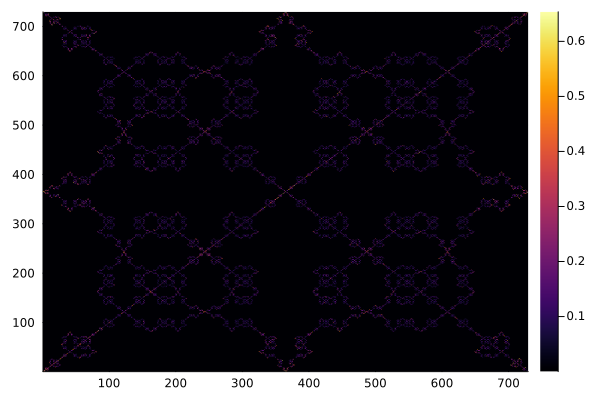

In [19]:
Xi=copy(kronecker(Z,kronecker(I(3),5)));

for i in 1:length(EigA);
    for j in 1:length(EigA)
        Corr[i,j]=abs(transpose(EigvecNew[i,:])*Xi*EigvecNew[j,:]);
    end
end

Plots.heatmap(Corr)

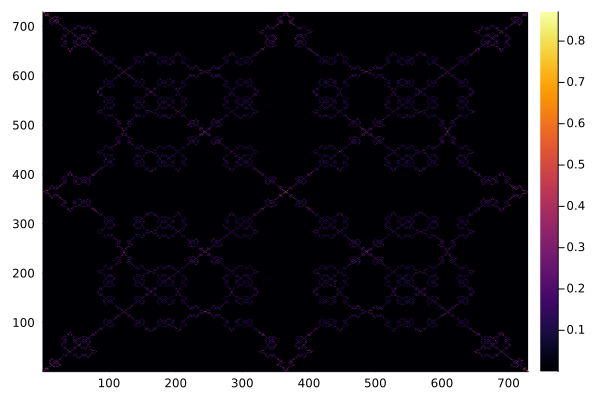

In [20]:
Xi=copy(kronecker(S,kronecker(I(3),5)));

for i in 1:length(EigA);
    for j in 1:length(EigA)
        Corr[i,j]=abs(transpose(EigvecNew[i,:])*Xi*EigvecNew[j,:]);
    end
end

Plots.heatmap(Corr)

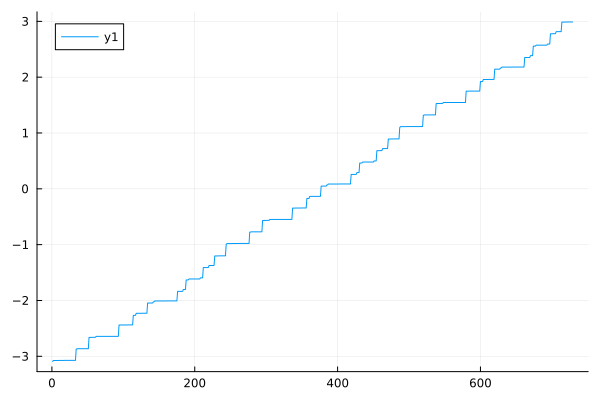

In [18]:
Plots.plot(real(Phnew[1,:]))